In [1]:
import matplotlib.pyplot as plt
import nltk
plt.style.use('ggplot')

In [2]:
import pandas as pd
df=pd.read_csv('reviews.csv')
df.shape

(568454, 10)

In [3]:
df1=df[:500]

In [4]:
df1.shape

(500, 10)

In [5]:
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


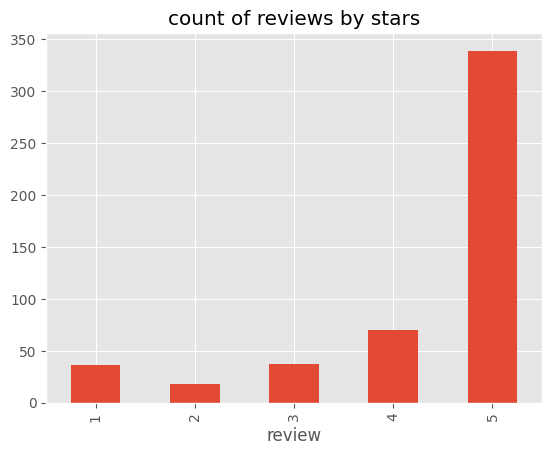

In [6]:
ax=df1['Score'].value_counts().sort_index().plot(
    title='count of reviews by stars',
    kind='bar')
ax.set_xlabel('review')
plt.show()

In [7]:
example=df1['Text'][50]
tokenize=nltk.word_tokenize(example)
tokenize[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [8]:
tagged=nltk.pos_tag(tokenize)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [9]:
entities=nltk.chunk.ne_chunk(tagged)
print(entities)

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia=SentimentIntensityAnalyzer()

In [11]:
sia.polarity_scores('i am fucking to happy')

{'neg': 0.0, 'neu': 0.43, 'pos': 0.57, 'compound': 0.6096}

In [12]:
sia.polarity_scores('this is disgusting')

{'neg': 0.63, 'neu': 0.37, 'pos': 0.0, 'compound': -0.5267}

In [13]:
res={}
for i,row in tqdm(df1.iterrows(),total=len(df)):
    text=row['Text']
    id=row['Id']
    res[id]=sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [14]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [15]:
vaders=pd.DataFrame(res).T
vaders.head()

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468


In [16]:
vaders=vaders.reset_index().rename(columns={'index':'id'})
vaders=pd.concat([vaders,df1],axis='columns')
vaders.head()

,id,neg,neu,pos,compound,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


C:\Users\PCR\AppData\Local\Temp\ipykernel_17284\1899717313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sn.barplot(data=vaders,x='Score',y='compound',palette='muted')


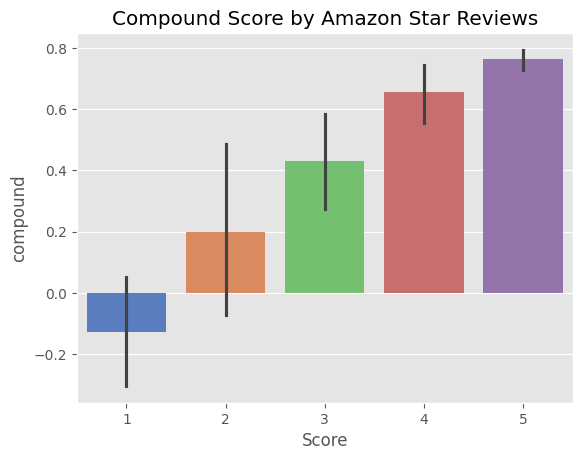

In [27]:

import seaborn as sn
ax=sn.barplot(data=vaders,x='Score',y='compound',palette='muted')
ax.set_title('Compound Score by Amazon Star Reviews')
plt.show()

C:\Users\PCR\AppData\Local\Temp\ipykernel_17284\1500941326.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(data=vaders,x='Score',y='pos',palette='muted')
C:\Users\PCR\AppData\Local\Temp\ipykernel_17284\1500941326.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(data=vaders,x='Score',y='neu',palette='muted')
C:\Users\PCR\AppData\Local\Temp\ipykernel_17284\1500941326.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(data=vaders,x='Score',y='neg',palette='muted')


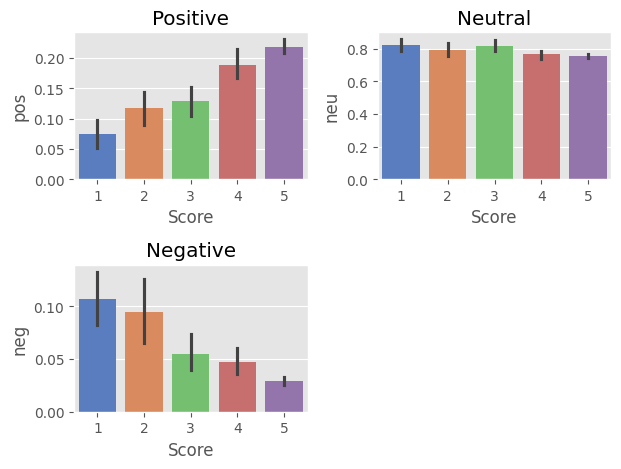

In [61]:
plt.subplot(221)
sn.barplot(data=vaders,x='Score',y='pos',palette='muted')
plt.title('Positive')
plt.subplot(222)
sn.barplot(data=vaders,x='Score',y='neu',palette='muted')
plt.title('Neutral')
plt.subplot(223)
sn.barplot(data=vaders,x='Score',y='neg',palette='muted')
plt.title('Negative')
plt.tight_layout()
plt.show()

In [64]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [72]:
tokenizer=AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment-latest')
model=AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment-latest')

C:\Users\PCR\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForS

In [82]:
import tensorflow as tf
import numpy as np
tf.experimental.numpy.experimental_enable_numpy_behavior()

In [98]:
def polarity_scores_roberta(example):
    encoded_text=tokenizer(example,return_tensors='pt')
    output=model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict={
        'negative':scores[0],
        'neutral':scores[1],
        'positive':scores[2],
    }
    return scores_dict

In [101]:
res_rob={}
for i,row in tqdm(df1.iterrows(),total=len(df)):
    try:
        text=row['Text']
        id=row['Id']
        res_rob[id]=polarity_scores_roberta(text)
    except RuntimeError:
        print(f'my id broke at {id}')

  0%|          | 0/568454 [00:00<?, ?it/s]

my id broke at 83
my id broke at 187
